In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

bad_circulation = pd.read_csv("bad_circulation.csv")
soso_circulation = pd.read_csv("soso_circulation.csv")

del bad_circulation['Unnamed: 0']
del soso_circulation['Unnamed: 0']

bad_date = bad_circulation.date
#home living 부분만 column 이름에 따라서 바꿔주면 됨. 원하는 거
bad_health_beauty = bad_circulation.health_beauty
soso_date = soso_circulation.date
soso_health_beauty = soso_circulation.health_beauty

bad_date = pd.DataFrame(bad_date)
bad_health_beauty = pd.DataFrame(bad_health_beauty)
soso_date = pd.DataFrame(soso_date)
soso_health_beauty = pd.DataFrame(soso_health_beauty)

bad = pd.concat([bad_date, bad_health_beauty], axis = 1)
soso = pd.concat([soso_date, soso_health_beauty], axis = 1)

bad = bad.rename(columns={'health_beauty': 'bad_health_beauty'})
soso = soso.rename(columns={'health_beauty': 'soso_health_beauty'})
bad = bad.reset_index(drop=True)
soso = soso.reset_index(drop=True)

bad_date = bad.date.tolist()
bad_health_beauty = bad.bad_health_beauty.tolist()
soso_date = soso.date.tolist()
soso_health_beauty = soso.soso_health_beauty.tolist()

bad_column = bad_circulation.columns
result = []
for i in bad_health_beauty:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)
    
bad_health_beauty = pd.DataFrame(result)
bad_date = pd.DataFrame(bad_date)

bad = pd.concat([bad_date, bad_health_beauty], axis = 1)
bad.columns = ["date", "bad_health_beauty"]

result = []
for i in soso_health_beauty:
    
    text = str(i)
    text= text.replace("%","")
    result.append(text)
    
soso_health_beauty = pd.DataFrame(result)
soso_date = pd.DataFrame(soso_date)

soso = pd.concat([soso_date, soso_health_beauty], axis = 1)
soso.columns = ["date", "soso_health_beauty"] 

bad_ha = {}
result = []
date = bad.date
health_beauty = bad.bad_health_beauty
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in bad_ha):
                    if type(bad_ha[date[i]]) != list:
                        result.append(bad_ha[date[i]])
                    else:
                        result = bad_ha[date[i]]
                    result.append(health_beauty[i])
                    bad_ha[date[i]] = result
                    pass
                else:
                    bad_ha[date[i]] = health_beauty[i]
            else:
                i = j
                break
        else:
            i = j
            break
            
bad_date_key = list(bad_ha.keys())
bad_health_beauty_aver = {}
health_beauty_result_bad = []
health_beauty_date_bad = []

for i in bad_date_key:
    aver = 0
    for j in bad_ha[i]:
        aver = aver + float(j)
    aver = aver / len(bad_ha[i])
    health_beauty_result_bad.append(aver)
    health_beauty_date_bad.append(i)
    bad_health_beauty_aver[i] = aver
    
soso_ha = {}
result = []
date = soso.date
health_beauty = soso.soso_health_beauty
for i in range(0, len(date)):
    result = []
    for j in range(i, len(date)):
        if i == j:
            if date[i] == date[j]:
                if(date[i] in soso_ha):
                    if type(soso_ha[date[i]]) != list:
                        result.append(soso_ha[date[i]])
                    else:
                        result = soso_ha[date[i]]
                    result.append(health_beauty[i])
                    soso_ha[date[i]] = result
                    pass
                else:
                    soso_ha[date[i]] = health_beauty[i]
            else:
                i = j
                break
        else:
            i = j
            break

soso_date_key = list(soso_ha.keys())
soso_health_beauty_aver = {} 
health_beauty_result_soso = []
health_beauty_date_soso = []

for i in soso_date_key:
    aver = 0
    for j in soso_ha[i]:
        aver = aver + float(j)
    aver = aver / len(soso_ha[i])
    health_beauty_result_soso.append(aver)
    health_beauty_date_soso.append(i)
    soso_health_beauty_aver[i] = aver
    
health_beauty_date_soso_temp = health_beauty_date_soso
health_beauty_date_soso_temp = pd.DataFrame(health_beauty_date_soso_temp)
health_beauty_result_soso_temp = health_beauty_result_soso
health_beauty_result_soso_temp = pd.DataFrame(health_beauty_result_soso_temp)
soso_health_beauty = pd.concat([health_beauty_date_soso_temp, health_beauty_result_soso_temp], axis=1)
soso_health_beauty.columns = ['date', 'aver_soso']

health_beauty_date_bad_temp = health_beauty_date_bad
health_beauty_date_bad_temp = pd.DataFrame(health_beauty_date_bad_temp)
health_beauty_result_bad_temp = health_beauty_result_bad
health_beauty_result_bad_temp = pd.DataFrame(health_beauty_result_bad_temp)
bad_health_beauty = pd.concat([health_beauty_date_bad_temp, health_beauty_result_bad_temp], axis=1)
bad_health_beauty.columns = ['date', 'aver_bad']

health_beauty = pd.merge(soso_health_beauty, bad_health_beauty, how='outer')
health_beauty = health_beauty.sort_values(by = "date")
health_beauty = health_beauty.reset_index()

del health_beauty['index']

health_beauty['DateTime'] = health_beauty['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
del health_beauty['date']
health_beauty = health_beauty.set_index("DateTime")


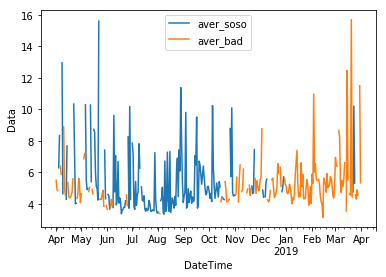

In [2]:
health_beauty.plot()
plt.ylabel("Data")
plt.rcParams["figure.figsize"] = [25,9]
plt.show()